# Исследование набора данных
## Датасет
Датасет содержит подробный анализ идеальных клиентов творческого магазина.
## Аттрибуты
| Аттрибут  | Тип | Описание |
| ------------- | ------------- | ------------- |
| Customer ID  | Числовой  | Уникальный номер |
| Gender  | Строковый  | Пол |
| Age  | Числовой  | Возраст |
| Annual Income  | Числовой  | Годовой доход |
| Spending Score  | Числовой  | Оценка расходов — оценка, присваиваемая магазином на основе поведения покупателей и характера расходов. |
| Profession  | Строковый  | Профессия |
| Work Experience  | Числовой  | Опыт работы в годах |
| Family Size  | Числовой  | Размер семьи |

## Задача
Лучше понимать своих клиентов.


In [1]:
import pandas as pd

In [2]:
dataSet = pd.read_csv("/customers.csv")

Удаляем строковые столбцы, так как будем анализировать числовые данные и уникальные идентификаторы за ненадобностью

In [3]:
dataSet.drop(["Gender", "Profession", "CustomerID"], axis=1, inplace=True)

In [4]:
dataSet.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,19,15000,39,1,4
1,21,35000,81,3,3
2,20,86000,6,1,1
3,23,59000,77,0,2
4,31,38000,40,2,6


Для каждого атрибута численного и булевого типа определим:
* Среднее значение
* СКО





In [5]:
pd.DataFrame({
    "mean": dataSet.mean(),
    "std": dataSet.std()
})

,mean,std
Age,48.9600,28.429747
Annual Income ($),110731.8215,45739.536688
Spending Score (1-100),50.9625,27.934661
Work Experience,4.1025,3.922204
Family Size,3.7685,1.970749


In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

Построим гистограмму распределения значений

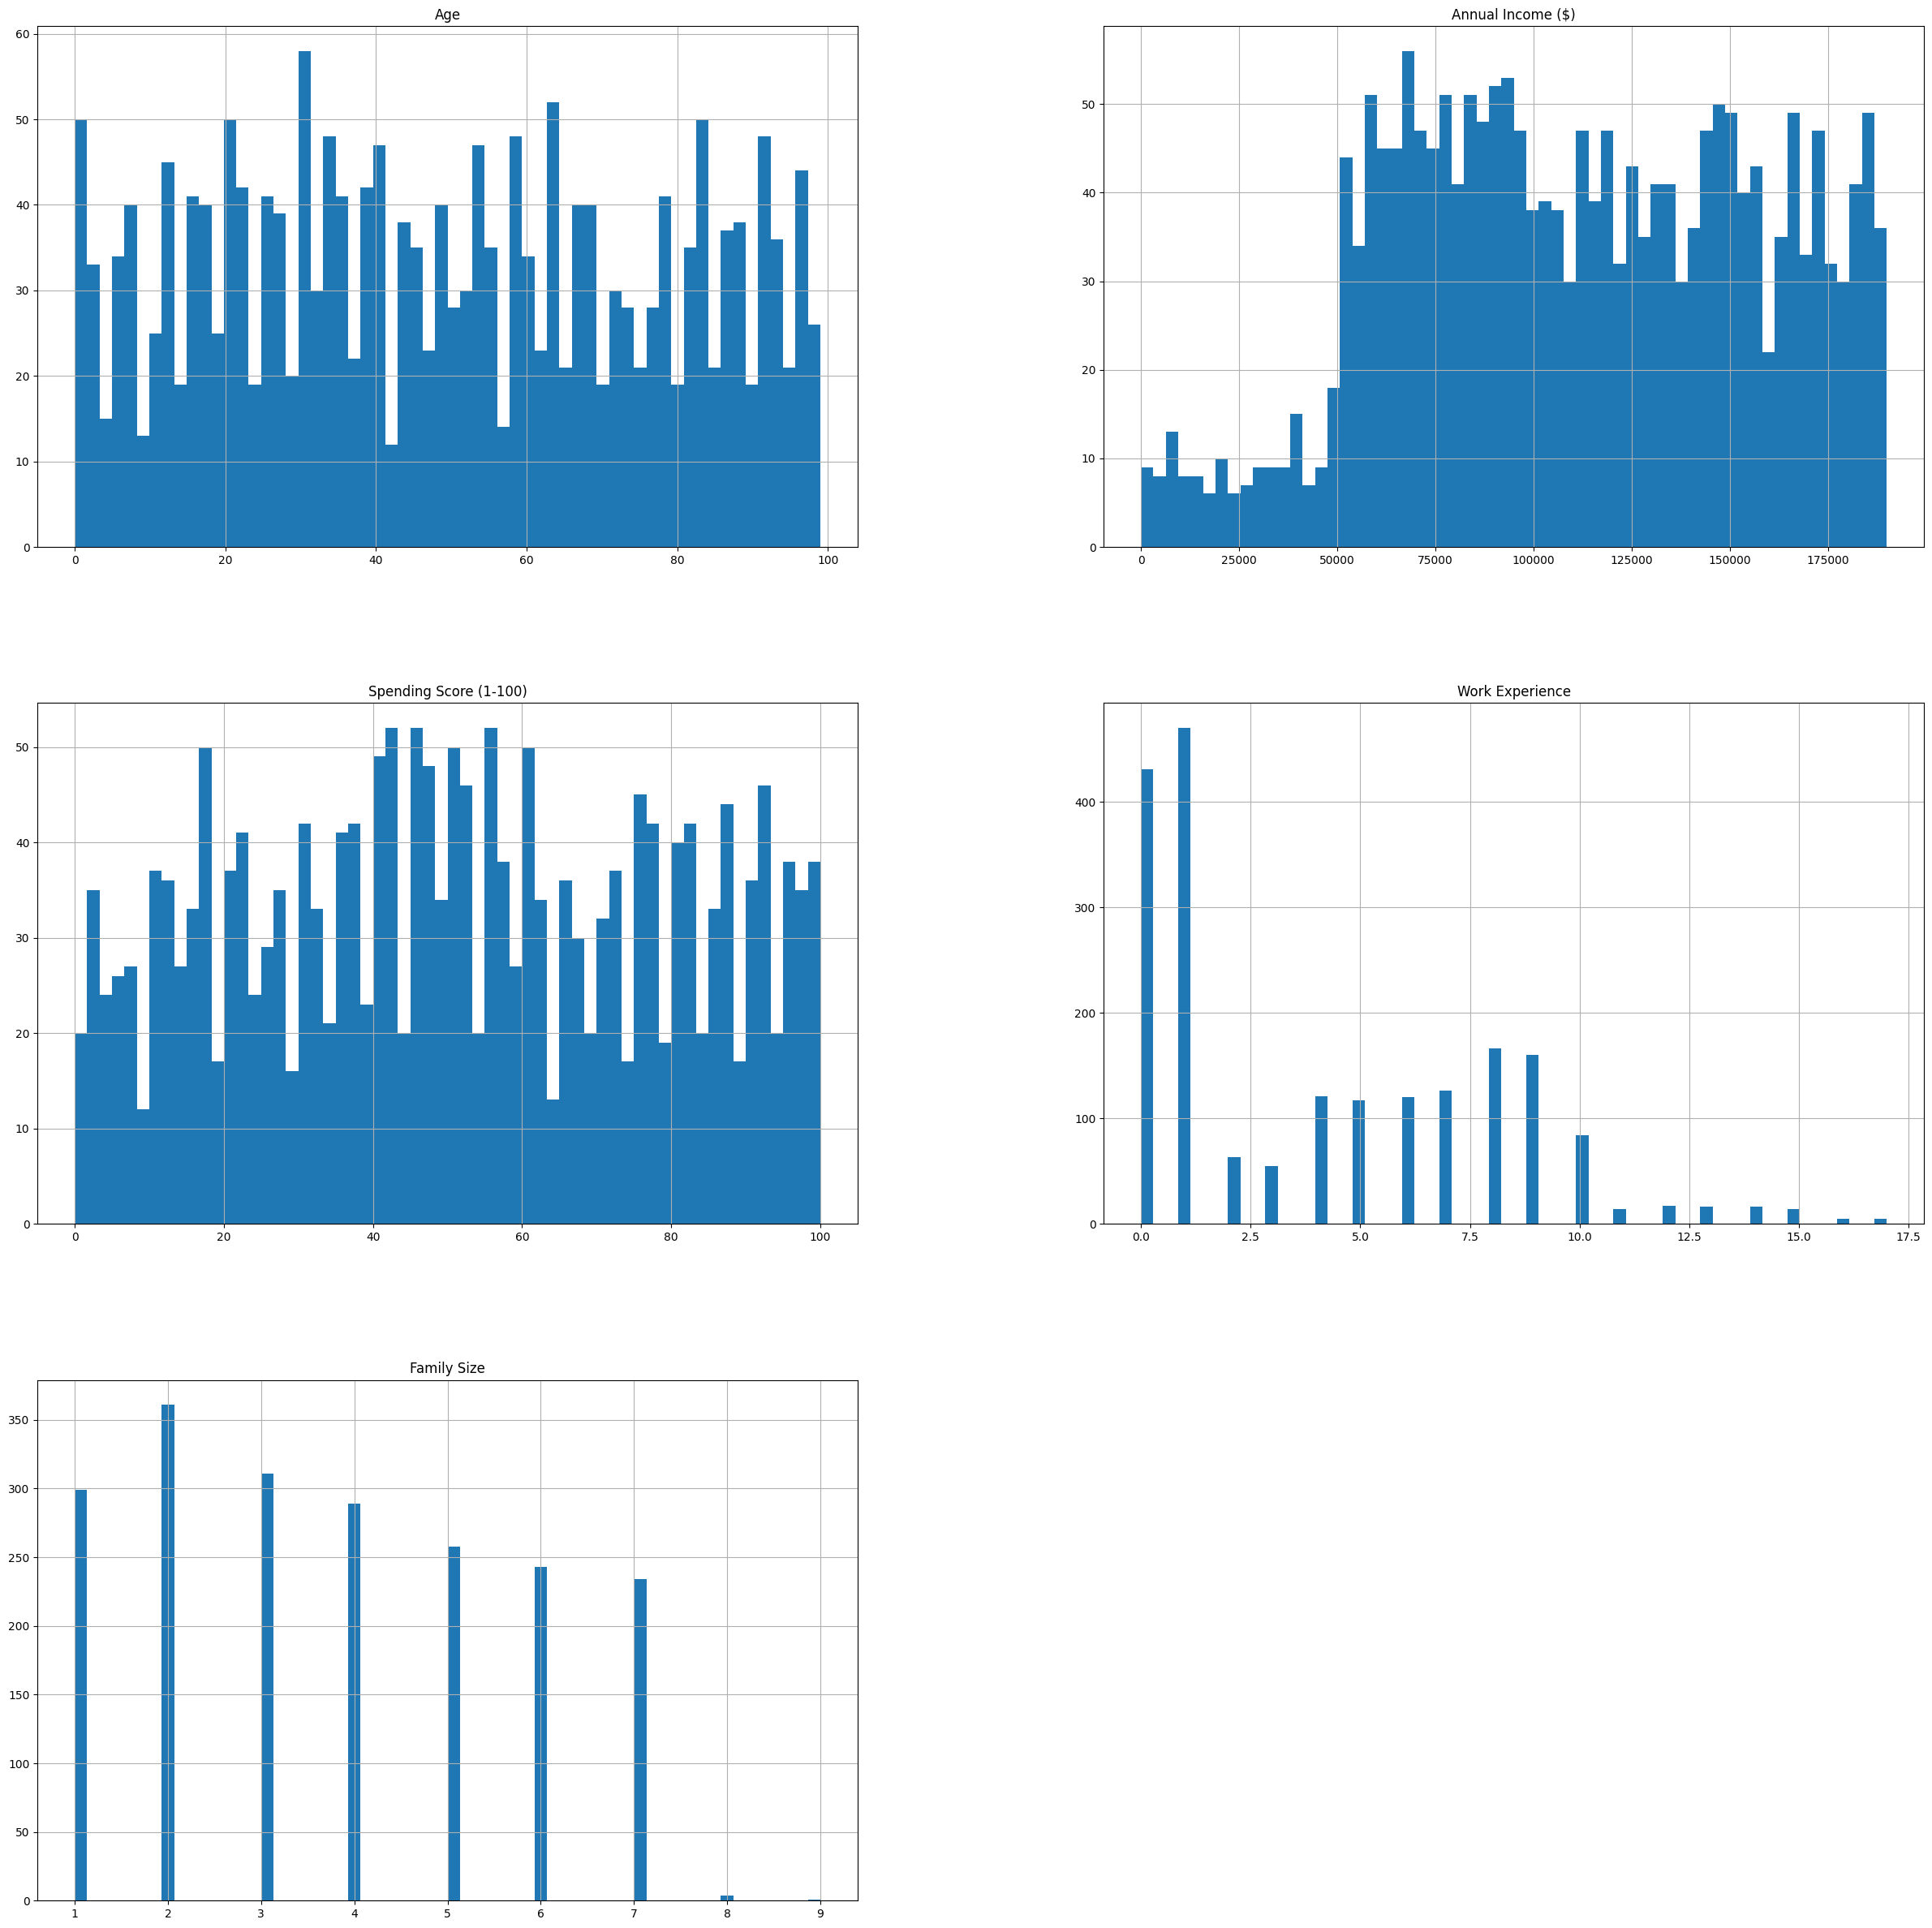

In [8]:
dataSet.hist(bins=60, figsize=(30, 30));

Определим наличие выбросов с помощью метода межквартильного диапазона (IQR)

Будем считать наблюдение выбросом, если его значение в 1,5 раза больше (меньше) IQR

In [9]:
threshold = 1.5
outliers = {}

for column in dataSet.columns:
    Q1 = dataSet[column].quantile(0.25)
    Q3 = dataSet[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = dataSet[(dataSet[column] < Q1 - threshold * IQR) | (dataSet[column] > Q3 + threshold * IQR)].size

In [10]:
pd.DataFrame({
    "outliers": outliers
})

,outliers
Age,0
Annual Income ($),0
Family Size,0
Spending Score (1-100),0
Work Experience,25


Определим, содержит ли датасет пропущенные значения

In [11]:
(dataSet.isna().sum(axis = 1) > 0).sum()

0

Посчитаем корреляцию между параметрами

In [12]:
correlation = dataSet.corr()
correlation.style.background_gradient(cmap = 'coolwarm')

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.038254,0.093005,0.002232,0.011873,1.000000


In [13]:
from itertools import combinations
from math import ceil

Групировка корреляции по абсолютному значению

In [14]:
correlations = {}

for pair in combinations(dataSet.columns, 2):
    left, top = pair
    value = correlation[left][top]
    key = ceil(abs(value) * 1000) / 1000
    result = (left, top, round(value, 3))

    if key not in correlations:
        correlations[key] = [result]
    else:
        correlations[key].append(result)

correlations = dict(sorted(correlations.items(), reverse=True))

Все значения корреляции получились маленькие, будем считать, что значения <= 0.03 не имеют корреляции между атрибутами

In [15]:
items = filter(lambda item: item[0] <= 0.03, correlations.items())

for key, value in sorted(items, reverse=True):
    print(key)
    for item in value:
        print(item)
    print()

0.029
('Spending Score (1-100)', 'Work Experience', -0.029)

0.024
('Annual Income ($)', 'Spending Score (1-100)', 0.023)

0.022
('Age', 'Annual Income ($)', 0.021)

0.015
('Age', 'Work Experience', -0.014)

0.012
('Work Experience', 'Family Size', 0.012)

0.003
('Spending Score (1-100)', 'Family Size', 0.002)



А значения >= 0.05 имеют высокую корреляцию

In [16]:
items = filter(lambda item: item[0] >= 0.05, correlations.items())

for key, value in sorted(items, reverse=True):
    print(key)
    for item in value:
        print(item)
    print()

0.094
('Annual Income ($)', 'Family Size', 0.093)

0.09
('Annual Income ($)', 'Work Experience', 0.089)



Построим матрицу графиков рассеивания

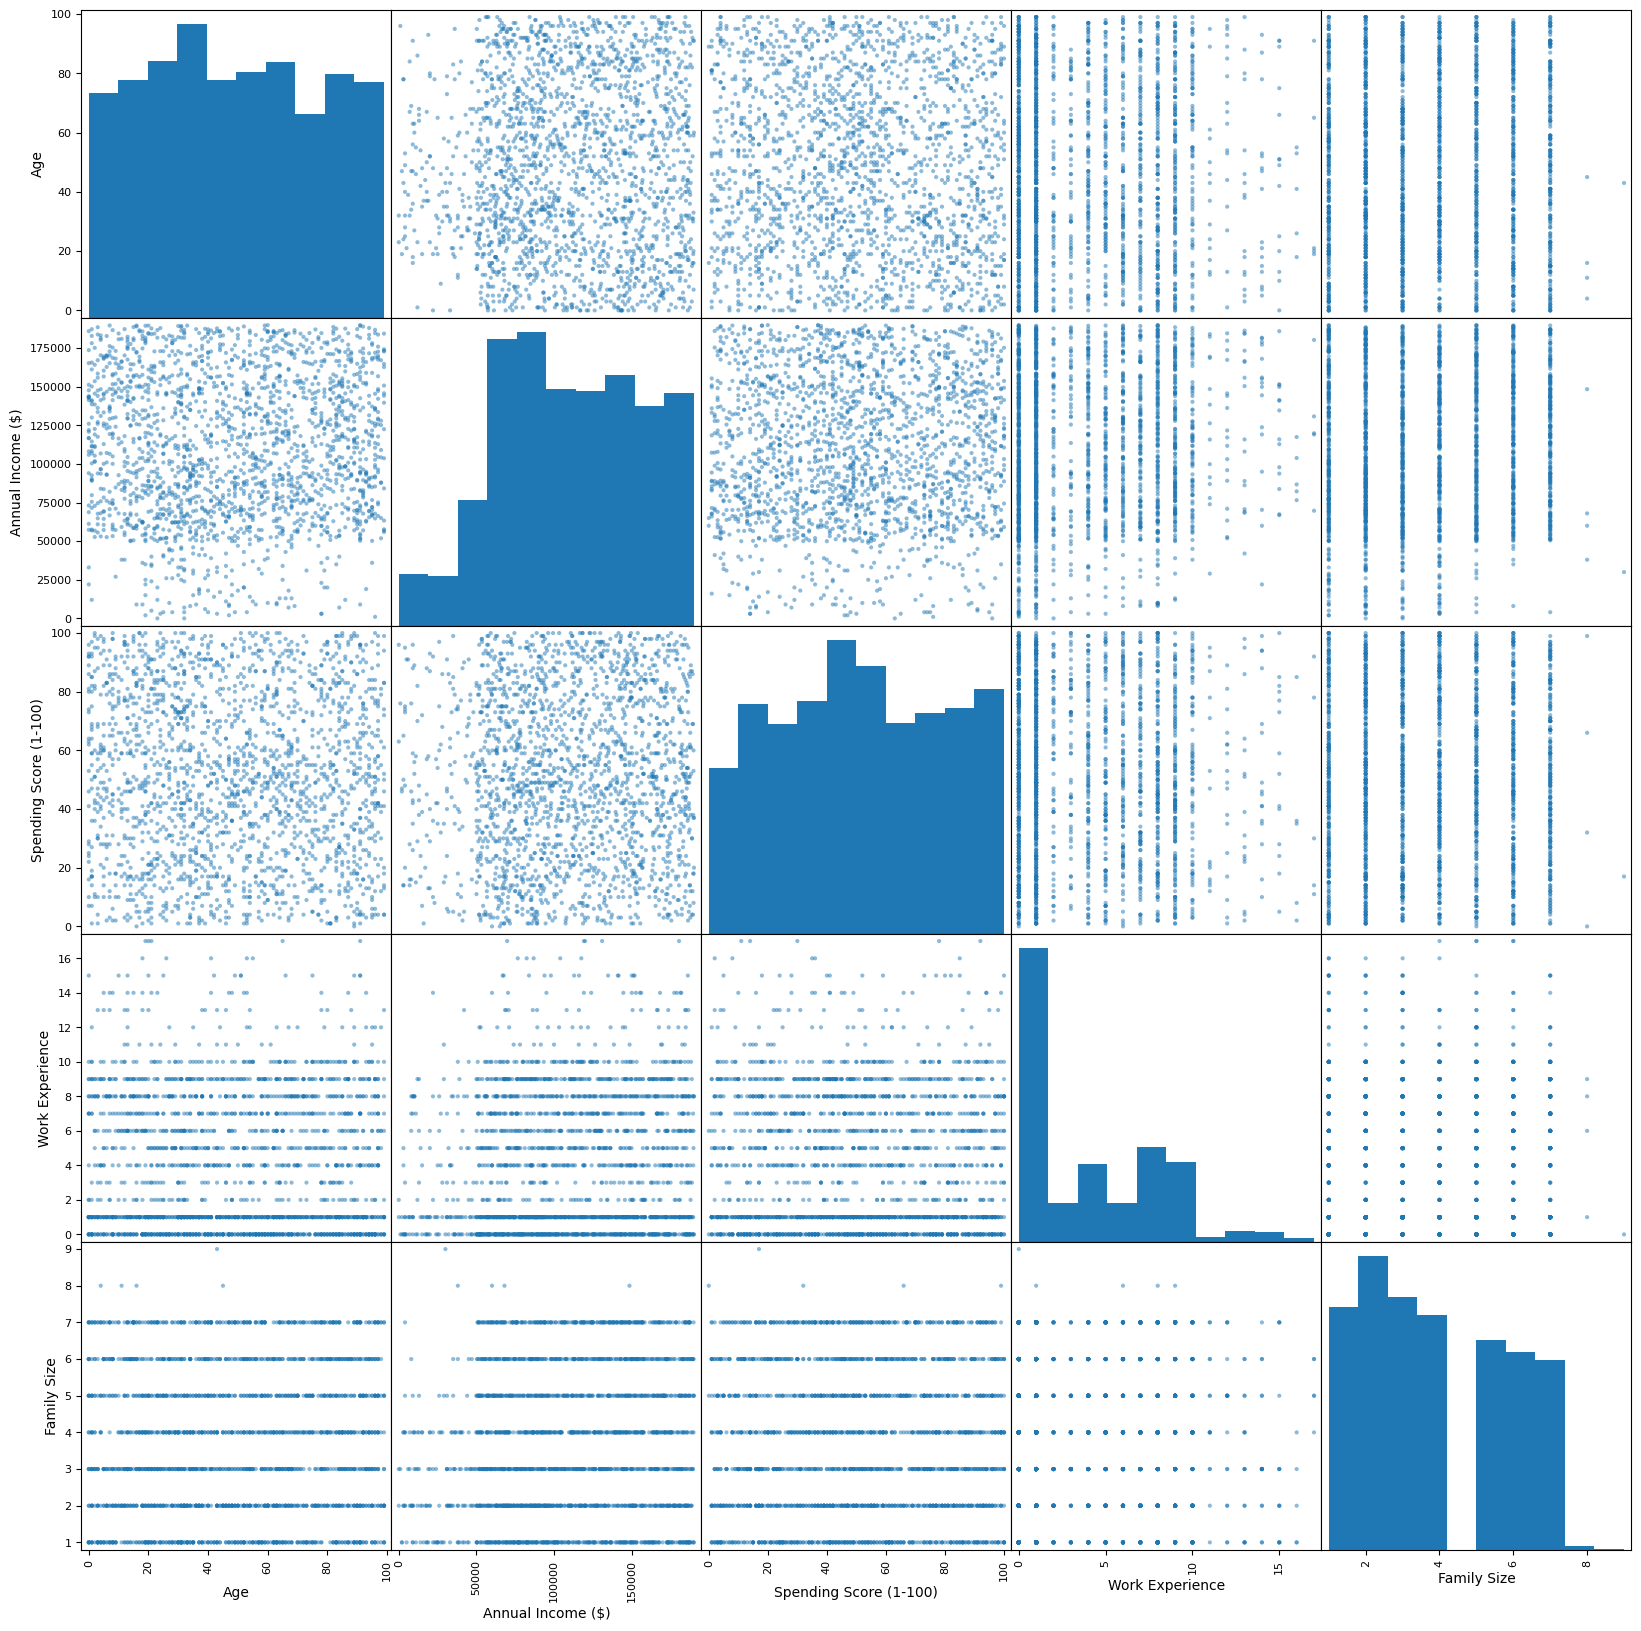

In [18]:
pd.plotting.scatter_matrix(dataSet, figsize=(20, 20));

Можно по сравнению с остальными результатами сделать вывод, что мы наблюдаем положительную корреляцию для:
* Оценки расходов и возраста
* Возраста и годового дохода
* Возраста и Оценки расходов